### Imports

Required packages including those needed for `image_arrays.py` and `hdf_utils.py`.
- h5py
- numpy
- scipy
- matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.patches import Rectangle

# local imports
from image_arrays import *
from hdf_utils import unpack_hdf
from plot_utils import clean_axes

### Activate interactive plotting
By default, inline plots are static. Here we specify one of two options (comment out the undesired command) that will open plots with GUI controls for us.
- **qt ->** figures opened in windows outside the notebook
- **notebook ->** figures within notebook underneath generating cell.

In [2]:
# %matplotlib qt 
%matplotlib notebook

### Load data

In [3]:
d = {}
for depth in ["DD", "PD"]:
    with h5.File("triggered_waves_%s.h5" % depth) as f:
        d[depth] = unpack_hdf(f)

dd = d["DD"]
pd = d["PD"]

print("Data Keys")
print("-------------")
for k in dd.keys():
   print(k) 

Data Keys
-------------
avg_cross_corr
avg_trig_event
avg_trig_lead
cross_xaxis
event_xaxis
lead_xaxis
offset_cross_xaxis
offset_event_xaxis
offset_lead_xaxis
scaled_cross_corr
scaled_trig_event
scaled_trig_lead


## Distal

<IPython.core.display.Javascript object>


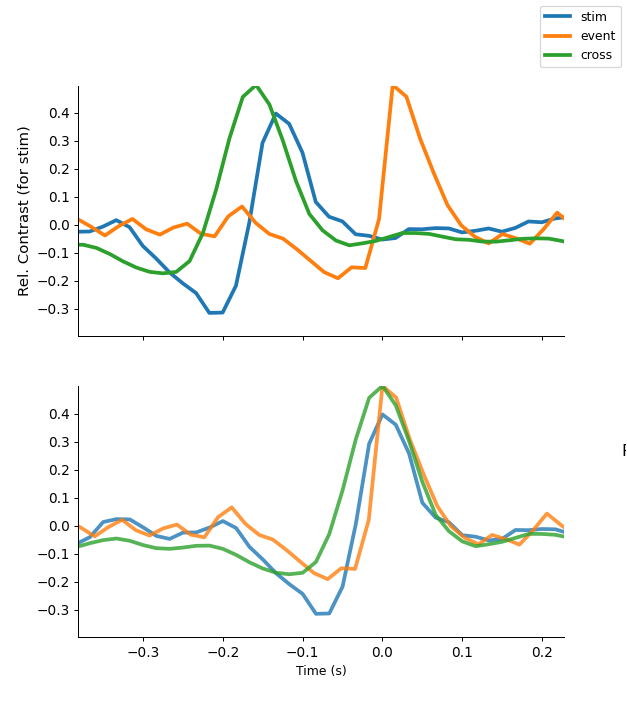

In [8]:
lead_vs_event_dd_fig, lead_vs_event_dd_ax = plt.subplots(
    2, sharex=True, sharey=True, figsize=(7, 8))

lead_vs_event_dd_ax[0].plot(dd["lead_xaxis"], dd["scaled_trig_lead"], linewidth=3, label="stim")
lead_vs_event_dd_ax[1].plot(dd["offset_lead_xaxis"], dd["scaled_trig_lead"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[0].plot(dd["event_xaxis"], dd["scaled_trig_event"], linewidth=3, label="event")
lead_vs_event_dd_ax[1].plot(dd["offset_event_xaxis"], dd["scaled_trig_event"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[0].plot(dd["cross_xaxis"], dd["scaled_cross_corr"], linewidth=3, label="cross")
lead_vs_event_dd_ax[1].plot(dd["offset_cross_xaxis"], dd["scaled_cross_corr"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[1].text(0.3, 0.25, "Peaks Aligned", fontsize=13)
lead_vs_event_dd_ax[0].set_ylabel("Rel. Contrast (for stim)", fontsize=12)
lead_vs_event_dd_ax[-1].set_xlabel("Time (s)")

lead_vs_event_dd_fig.legend()
clean_axes(lead_vs_event_dd_ax)

## Proximal

<IPython.core.display.Javascript object>


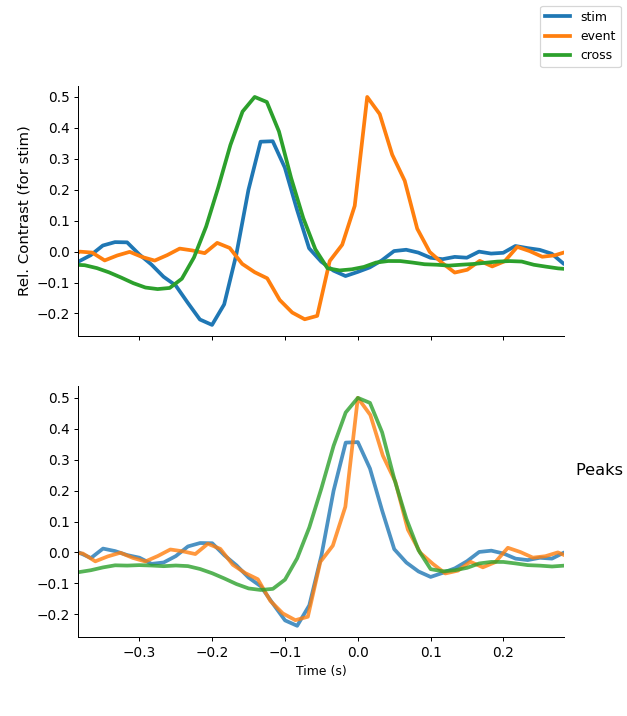

In [9]:
lead_vs_event_pd_fig, lead_vs_event_pd_ax = plt.subplots(
    2, sharex=True, sharey=True, figsize=(7, 8))

lead_vs_event_pd_ax[0].plot(pd["lead_xaxis"], pd["scaled_trig_lead"], linewidth=3, label="stim")
lead_vs_event_pd_ax[1].plot(pd["offset_lead_xaxis"], pd["scaled_trig_lead"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[0].plot(pd["event_xaxis"], pd["scaled_trig_event"], linewidth=3, label="event")
lead_vs_event_pd_ax[1].plot(pd["offset_event_xaxis"], pd["scaled_trig_event"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[0].plot(pd["cross_xaxis"], pd["scaled_cross_corr"], linewidth=3, label="cross")
lead_vs_event_pd_ax[1].plot(pd["offset_cross_xaxis"], pd["scaled_cross_corr"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[1].text(0.3, 0.25, "Peaks Aligned", fontsize=13)
lead_vs_event_pd_ax[0].set_ylabel("Rel. Contrast (for stim)", fontsize=12)
lead_vs_event_pd_ax[-1].set_xlabel("Time (s)")

lead_vs_event_pd_fig.legend()
clean_axes(lead_vs_event_pd_ax)

## Proximal vs Distal

<IPython.core.display.Javascript object>


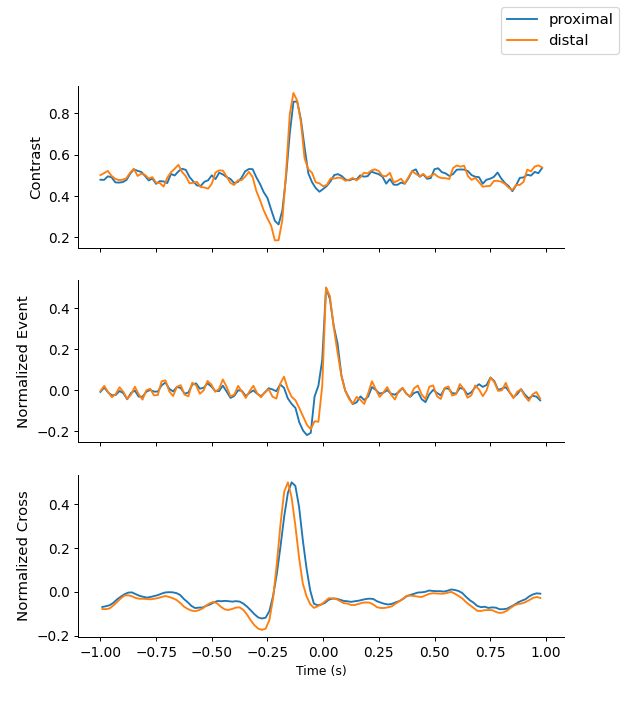

In [6]:
prox_vs_dist_fig, prox_vs_dist_ax = plt.subplots(3, sharex=True, figsize=(7, 8))

prox_vs_dist_ax[0].plot(pd["lead_xaxis"], pd["avg_trig_lead"], label="proximal")
prox_vs_dist_ax[0].plot(dd["lead_xaxis"], dd["avg_trig_lead"], label="distal")
prox_vs_dist_ax[0].set_ylabel("Contrast", fontsize=12)

prox_vs_dist_ax[1].plot(pd["event_xaxis"], pd["scaled_trig_event"])
prox_vs_dist_ax[1].plot(dd["event_xaxis"], dd["scaled_trig_event"])
prox_vs_dist_ax[1].set_ylabel("Normalized Event", fontsize=12)

prox_vs_dist_ax[2].plot(pd["cross_xaxis"], pd["scaled_cross_corr"])
prox_vs_dist_ax[2].plot(dd["cross_xaxis"], dd["scaled_cross_corr"])
prox_vs_dist_ax[2].set_ylabel("Normalized Cross", fontsize=12)

prox_vs_dist_ax[-1].set_xlabel("Time (s)")

prox_vs_dist_fig.legend(fontsize=12)
clean_axes(prox_vs_dist_ax)

<IPython.core.display.Javascript object>


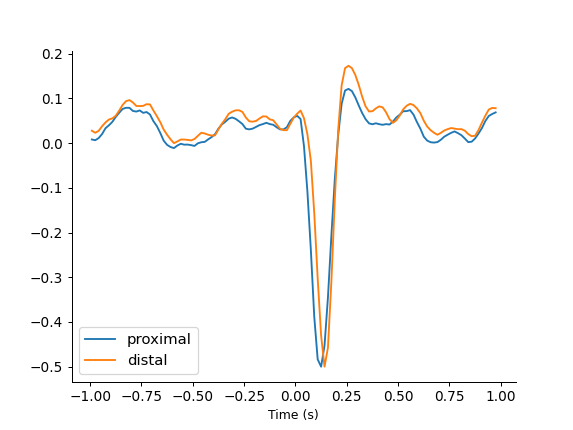

In [16]:
fransen_fig, fransen_ax = plt.subplots(1)
fransen_ax.plot(pd["cross_xaxis"], np.flip(pd["scaled_cross_corr"]) * -1, label="proximal")
fransen_ax.plot(dd["cross_xaxis"], np.flip(dd["scaled_cross_corr"]) * -1, label="distal")
fransen_ax.set_xlabel("Time (s)")
fransen_ax.legend(fontsize=12)
clean_axes(fransen_ax)